In [7]:
import pickle
import cv2

import pandas as pd
from pandas import DataFrame

import torch
from torch import Tensor

from architecture import *

import matplotlib.pyplot as plt

import mediapipe as mp
import numpy as np

from process_image import process_image

# Load Data

In [8]:
# Loading Model from pickle
with open('generated-data/model/model.pkl', 'rb') as file:
    model = pickle.load(file)

# Loading feature pipeline from pickle
with open('generated-data/preprocessed-data/feature_pipeline.pkl', 'rb') as file:
    feature_pipeline = pickle.load(file)

# Loading feature pipeline from pickle
with open('generated-data/preprocessed-data/label_pipeline.pkl', 'rb') as file:
    label_pipeline = pickle.load(file)

# Process Image

I0000 00:00:1726849357.205570    3484 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1726849357.206185    3611 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: AMD Radeon RX 6700 XT (navi22, LLVM 15.0.7, DRM 3.57, 6.8.0-40-generic)


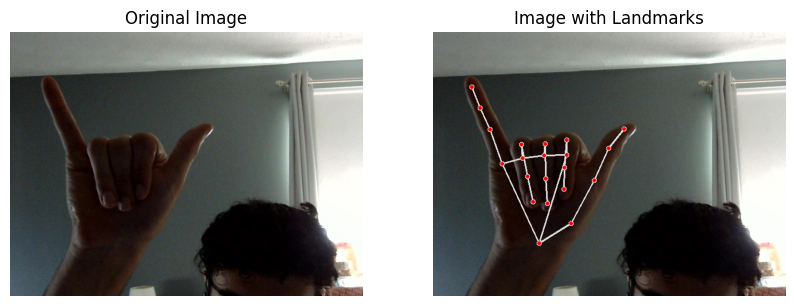

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.300844,0.391021,0.457243,0.497122,0.542182,0.379054,0.379189,0.372987,0.371557,0.315356,...,-0.090426,-0.083566,-0.017054,-0.078695,-0.085612,-0.068239,-0.024637,-0.058792,-0.070461,-0.069121


In [9]:
landmark_data = DataFrame(process_image('captured_image.jpg', show=True, label=False)).T
landmark_data.columns = [f'x{x}' for x in range(21)] + [f'y{x}' for x in range(21)] + [f'z{x}' for x in range(21)]
landmark_data.head()

# Scale Feature Data

In [10]:
scaled_data = feature_pipeline.transform(landmark_data)
scaled_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.27035,0.33498,0.392798,0.459364,0.495267,0.366896,0.359202,0.354229,0.381709,0.307898,...,0.679713,0.722934,0.777936,0.696308,0.699665,0.736478,0.699255,0.66763,0.659515,0.670652


# Model Prediction

In [11]:
prediction = np.argmax(nn.Softmax(1)(model(Tensor(scaled_data.values))).detach().numpy())
prediction

23

In [12]:
label_pipeline.inverse_transform(DataFrame([[prediction]])).values[0][0]

'Y'